In [ ]:
# Cell 1: ANN iris species
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import homogeneity_score

import pandas as pd
import numpy as np

iris = pd.read_csv("Iris.csv")

X = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y = iris["Species"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = MLPClassifier(random_state=0,max_iter=200).fit(X_train,Y_train)

prediction = model.predict(X_test)
print("Prediction based on testing data: ",prediction)

score = model.score(X_test,Y_test)
print("Testing score:",score)
score = model.score(X_train,Y_train)
print("Training score:",score)

In [25]:
#Cell 2: ANN breast cancer test

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import homogeneity_score
import warnings
warnings.warn("deprecated",DeprecationWarning)

import pandas as pd
import numpy as np

BCancer = pd.read_csv("Breast_Cancer_Data-P1.csv")
BCancer.dropna()

label = preprocessing.LabelEncoder()
BCancer['diagnosis'] = label.fit_transform(BCancer['diagnosis'])

Diagnosis = pd.get_dummies(BCancer["diagnosis"],drop_first=True)
BCancer = pd.concat([BCancer,Diagnosis],axis=1)
BCancer.drop(['id','diagnosis'],axis=1,inplace=True)

X = BCancer.iloc[:,:-1].values
Y = BCancer.iloc[:,-1].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = MLPClassifier(random_state=0,max_iter=200).fit(X_train,Y_train)

prediction = model.predict(X_test)

malign = benign = 0

for element in prediction:
    if element == 1:
        malign += 1
    else:
        benign += 1

print("Cases malign: ", malign)
print("Cases benign: ", benign)

# print("Prediction based on testing data: ",prediction)

score = model.score(X_test,Y_test)
print("Testing score:",score)
score = model.score(X_train,Y_train)
print("Training score:",score)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8884\2582988291.py:9: DeprecationWarning: deprecated
  warnings.warn("deprecated",DeprecationWarning)


Cases malign:  64
Cases benign:  79
Testing score: 0.8671328671328671
Training score: 0.9154929577464789


Training score:  0.7327102803738318
Testing score:  0.6815642458100558
Survived:  57  Died:  122


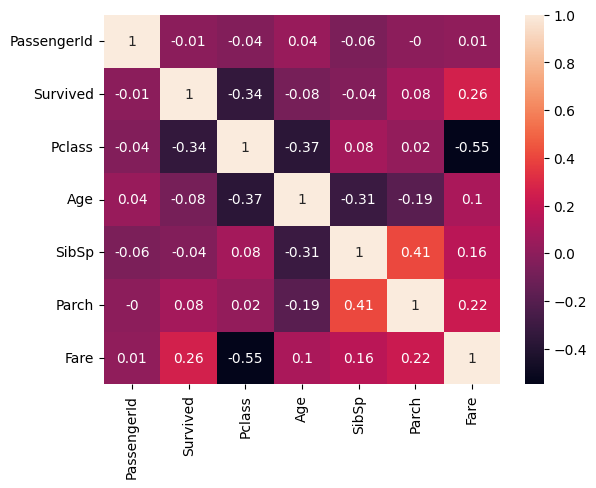

In [34]:
# Cell 3: Titanic data set
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

titanicData = pd.read_csv("Titanic-Dataset_1.csv")
correlation_matrix = titanicData.corr().round(2)
# Data visualisation
sns.heatmap(data=correlation_matrix,annot=True)

# Cleansing of data

titanicData.drop(["Sex","Embarked","Pclass","PassengerId","Ticket","Name","Cabin"],axis=1,inplace=True)

titanicData = titanicData.dropna()

Y = titanicData["Survived"]
X = titanicData.drop("Survived",axis=1)

X_Train,X_Test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = MLPClassifier(random_state=0).fit(X_Train,Y_train)
score = model.score(X_Train,Y_train)
print("Training score: ", score)
score = model.score(X_Test,Y_test)
print("Testing score: ", score)

prediction = model.predict(X_Test)

survived = died = 0 
for element in prediction:
    if element == 0:
        died += 1
    else:
        survived += 1

print("Survived: ",survived, " Died: ", died)
